# Physics 256
## Lecture 08 - I/O & Numpy

<img src="http://www.numpy.org/_static/numpy_logo.png" width=300px>

## Last Time

- wrote a module to compute $\pi$ in various ways
- saw Monte Carlo for the first time!
- working with the filesystem
- file input/output

## Today
- working with numerical data
- introduction to Numpy


<div class="span alert alert-success">
<h2> Team programming challenge </h2>
<h3> Average energy for the simple harmonic oscillator at finite temperature</h3>
</div>

I have uploaded a data file on BlackBoard in the Week 03 Course Materials called `sho_energy.dat`.  The line contains column headings with units in kelvin.

The next set of lines contain quantum Monte Carlo measurements for the kinetic and potential energy of the simple harmonic osscilator at $T = 0.5~\mathrm{K}$ where $\hbar \omega/k_{\mathrm{B}} = 1$.  The exact answer is known to be:
\begin{equation}
E(T) = \frac{\hbar \omega}{2} \coth \frac{\hbar \omega}{2 k_{\mathrm{B}} T}.
\end{equation}

Download the data file to your computer and write a program that loads the file from disk and computes the average total energy of all lines.  If you have extra time, compare with the exact result.

In [1]:
!cat data/sho_energy.dat

#         Kinetic       Potential 
   6.22407909E-01  3.77134851E-01  
   4.29547101E-01  2.42379252E-01  
   2.37001671E-01  2.67495403E-01  
   3.01818649E-01  2.58392255E-01  
   4.09565316E-01  3.15222495E-01  
   2.14317707E-01  4.51218376E-01  
   4.18641845E-01  2.89516631E-01  
   3.66230261E-01  2.80669596E-01  
   2.39985912E-01  3.49197015E-01  
   4.08868551E-01  2.73554341E-01  
   4.29891894E-01  2.28270437E-01  
   1.76880098E-01  3.74807008E-01  
   4.50146777E-01  2.60430892E-01  
   2.94294733E-01  3.82058897E-01  
   4.52161080E-01  2.44881829E-01  
   3.44609451E-01  3.31618376E-01  
   4.01977123E-01  2.86437236E-01  
   1.95875270E-01  3.09855155E-01  
   4.07812408E-01  3.67230198E-01  
   2.81732855E-01  3.38656673E-01  
   3.49238393E-01  2.34915354E-01  
   7.58970450E-02  3.47864555E-01  
   2.35324623E-01  2.41883096E-01  
   4.14538771E-01  4.14814837E-01  
   3.56186180E-01  2.82852947E-01  
   3.08263779E-01  2.61148485E-01  
   3.51531602E-01  3.84750836

In [ ]:
# %load "data/sho_average.py"
'''
sho_average.py
Compute the average energy of the simple harmonic osscilator from an input
file
'''

import math

# -----------------------------------------------------------------------------
def sho_energy(T):
    '''Return the energy of a simple harmonic osscilator at temperature T.'''
    # \hbar \omega / k_B = 1
    return 0.5/math.tanh(0.5/T)


# -----------------------------------------------------------------------------
def main():
    # open the file for reading
    data_file = open('sho_energy.dat', 'r')

    # get the column labels
    data_labels = data_file.readline()

    # split it at the spaces
    labels = data_labels.split()

    # remove the comment character
    labels.remove('#')

    # create an empty dictionary that will hold the data
    data = {}

    # initialize it with empty lists
    for label in labels:
        data[label] = []

    # go through each line of the file
    for line in data_file.readlines():
        # get a list of columns
        values = line.split()

        # go through each value, convert to float and add to our list
        for n,value in enumerate(values):
            data[labels[n]].append(float(value))

    # close the file
    data_file.close()

    # now that we have all the data, we can compute the averages
    data_average = {}
    for label in labels:
        data_average[label] = 0.0

        for value in data[label]:
            data_average[label] += value

        data_average[label] /= len(data[label])

    print('Total Energy = %6.3f K' % (data_average['Kinetic'] + data_average['Potential']))
    print('Exact Energy = %6.3f K' % sho_energy(0.5))

# -----------------------------------------------------------------------------
if __name__ == '__main__':
    main()


## NumPy

NumPy is the fundamental package needed for scientific computing with Python. It contains among other things:
- a powerful N-dimensional array object 
- sophisticated and optimized array (broadcasting) functions
- tools for integrating C/C++ and Fortran code 
- useful linear algebra, Fourier transform, and random number capabilities

We can import all this functionality using the `import` command.  It is customary to use the shortform `np`

In [2]:
import numpy as np

In [3]:
# Using Numpy!
data = np.genfromtxt('data/sho_energy.dat',names=True, comments='#')
print('Total Energy = %5.3f K' % (np.average(data['Kinetic']+data['Potential'])))
print('Exact Energy = %5.3f K' % (0.5/np.tanh(1.0)))

Total Energy = 0.667 K
Exact Energy = 0.657 K


In [4]:
data

array([(0.622407909, 0.377134851), (0.429547101, 0.242379252),
       (0.237001671, 0.267495403), (0.301818649, 0.258392255),
       (0.409565316, 0.315222495), (0.214317707, 0.451218376),
       (0.418641845, 0.289516631), (0.366230261, 0.280669596),
       (0.239985912, 0.349197015), (0.408868551, 0.273554341),
       (0.429891894, 0.228270437), (0.176880098, 0.374807008),
       (0.450146777, 0.260430892), (0.294294733, 0.382058897),
       (0.45216108, 0.244881829), (0.344609451, 0.331618376),
       (0.401977123, 0.286437236), (0.19587527, 0.309855155),
       (0.407812408, 0.367230198), (0.281732855, 0.338656673),
       (0.349238393, 0.234915354), (0.075897045, 0.347864555),
       (0.235324623, 0.241883096), (0.414538771, 0.414814837),
       (0.35618618, 0.282852947), (0.308263779, 0.261148485),
       (0.351531602, 0.384750836), (0.413973099, 0.353702293),
       (0.392675219, 0.293938978), (0.377202537, 0.425175485),
       (0.0391846384, 0.284571148), (0.313953529, 0.254153

In [7]:
for name in data.dtype.names:
    print(name)

Kinetic
Potential


NumPy contains array-optimized versions of all the standard library math functions.

In [8]:
print(np.sqrt(1.234))

# can deal with complex numbers
print(np.conjugate(1+3j))

1.11085552616
(1-3j)


The most important part of NumPy for us is the array datatype.  We can create arrays using:
- python lists
- special functions `zeros`, `ones`, `arange`, `linspace`, etc.
- directy from files

### Creation from lists

In [11]:
a = np.array([0,1,2,3,4])
a
b = np.array([i for i in range(100)])
print(b)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74
 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99]


In [12]:
# It will try to dynamically guess
# the type unless we specify with ‘dtype’
a = np.array([0,1,2],dtype=float)
a

array([ 0.,  1.,  2.])

<div class="span alert alert-danger">
Numpy arrays are **statically typed**.  This allows them to be extremely fast with highly optimized array operations.  However, we cannot use them as heterogenous object collections.
</div>

In [13]:
a[0] = 'hello'

ValueError: could not convert string to float: 'hello'

In [14]:
# use dtype to see the type of an array
a.dtype

dtype('float64')

### Using array creation functions

In [15]:
# `arange` is like `range` except it can produce lists of floats
a = np.arange(0,10,0.5)
a

array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
        5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5])

In [16]:
np.sqrt(a)

array([ 0.        ,  0.70710678,  1.        ,  1.22474487,  1.41421356,
        1.58113883,  1.73205081,  1.87082869,  2.        ,  2.12132034,
        2.23606798,  2.34520788,  2.44948974,  2.54950976,  2.64575131,
        2.73861279,  2.82842712,  2.91547595,  3.        ,  3.082207  ])

In [17]:
# zeros and ones work as expected
a0 = np.zeros(10)
a1 = np.ones(10)

a2 = np.zeros_like(a1)

print(a0)
print(a1)
print(a2)

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


In [18]:
# linspace allows us to divide a region in to N linear pieces
a = np.linspace(0,1,10)
a

array([ 0.        ,  0.11111111,  0.22222222,  0.33333333,  0.44444444,
        0.55555556,  0.66666667,  0.77777778,  0.88888889,  1.        ])

In [19]:
# `logspace` can do the same for exponential functions
l = np.logspace(0, 10, 10, base=np.e)
l

array([  1.00000000e+00,   3.03773178e+00,   9.22781435e+00,
         2.80316249e+01,   8.51525577e+01,   2.58670631e+02,
         7.85771994e+02,   2.38696456e+03,   7.25095809e+03,
         2.20264658e+04])

## We can also make arrays filled with random numbers

In [21]:
r = np.random.random(100)
r

array([ 0.73934775,  0.46542108,  0.69588297,  0.7185467 ,  0.86461199,
        0.22761383,  0.25242562,  0.38028761,  0.91662061,  0.87294093,
        0.23054526,  0.2554207 ,  0.4558353 ,  0.47419194,  0.97372686,
        0.55929384,  0.22198441,  0.58392934,  0.61406328,  0.28354764,
        0.02299033,  0.41981317,  0.33063449,  0.92685623,  0.29973477,
        0.17337547,  0.94741664,  0.40567867,  0.72804284,  0.13366162,
        0.19841648,  0.87527464,  0.55214491,  0.60978674,  0.64338985,
        0.61792799,  0.34642697,  0.58207713,  0.92593782,  0.45681484,
        0.10524623,  0.9888848 ,  0.02948178,  0.37580938,  0.5540696 ,
        0.80869315,  0.37451803,  0.21388257,  0.482871  ,  0.00264605,
        0.65436084,  0.89201641,  0.71953958,  0.30222324,  0.07297904,
        0.73724499,  0.72076489,  0.2909134 ,  0.37675201,  0.88949551,
        0.57268237,  0.86873958,  0.19320659,  0.57207939,  0.79761829,
        0.85950627,  0.01886307,  0.59940825,  0.15888996,  0.59

<div class="span alert alert-danger">
Note that when using linspace, the endpoints are included!!!
</div>

The numpy routines are **much** faster than the built in python methods

In [22]:
# making an array of squares
%timeit [i**2 for i in range(1000)]

1000 loops, best of 3: 377 µs per loop


In [23]:
%timeit np.arange(1000)**2

The slowest run took 45.14 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 2.39 µs per loop


### Indexing

Works exactly the same as for python lists

In [25]:
a = np.arange(10)**3
print(a)
print(a[1])
print(a[:3])
print(a[-1:-3:-1])

[  0   1   8  27  64 125 216 343 512 729]
1
[0 1 8]
[729 512]


## Getting help

In addition to the regular help command, numpy has interactive help

In [26]:
np.lookfor('create array')

Search results for 'create array'
---------------------------------
numpy.array
    Create an array.
numpy.memmap
    Create a memory-map to an array stored in a *binary* file on disk.
numpy.diagflat
    Create a two-dimensional array with the flattened input as a diagonal.
numpy.fromiter
    Create a new 1-dimensional array from an iterable object.
numpy.partition
    Return a partitioned copy of an array.
numpy.ma.diagflat
    Create a two-dimensional array with the flattened input as a diagonal.
numpy.ctypeslib.as_array
    Create a numpy array from a ctypes array or a ctypes POINTER.
numpy.ma.make_mask
    Create a boolean mask from an array.
numpy.ctypeslib.as_ctypes
    Create and return a ctypes object from a numpy array.  Actually
numpy.ma.mrecords.fromarrays
    Creates a mrecarray from a (flat) list of masked arrays.
numpy.ma.mvoid.__new__
    Create a new masked array from scratch.
numpy.lib.format.open_memmap
    Open a .npy file as a memory-mapped array.
numpy.ma.MaskedArr

In [27]:
help(np.diagflat)

Help on function diagflat in module numpy.lib.twodim_base:

diagflat(v, k=0)
    Create a two-dimensional array with the flattened input as a diagonal.
    
    Parameters
    ----------
    v : array_like
        Input data, which is flattened and set as the `k`-th
        diagonal of the output.
    k : int, optional
        Diagonal to set; 0, the default, corresponds to the "main" diagonal,
        a positive (negative) `k` giving the number of the diagonal above
        (below) the main.
    
    Returns
    -------
    out : ndarray
        The 2-D output array.
    
    See Also
    --------
    diag : MATLAB work-alike for 1-D and 2-D arrays.
    diagonal : Return specified diagonals.
    trace : Sum along diagonals.
    
    Examples
    --------
    >>> np.diagflat([[1,2], [3,4]])
    array([[1, 0, 0, 0],
           [0, 2, 0, 0],
           [0, 0, 3, 0],
           [0, 0, 0, 4]])
    
    >>> np.diagflat([1,2], 1)
    array([[0, 1, 0],
           [0, 0, 2],
           [0, 0, 

### Array operations

<div class="span alert alert-danger">
These work on an element-by-element basis, and operate mathematically, unlike python lists
</div>

In [30]:
a1 = np.arange(0.0,2.0*np.pi,np.pi/6)
a2 = np.ones_like(a1)
print(a1)
print(a2)

[ 0.          0.52359878  1.04719755  1.57079633  2.0943951   2.61799388
  3.14159265  3.66519143  4.1887902   4.71238898  5.23598776  5.75958653]
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]


In [31]:
a1 + a2

array([ 1.        ,  1.52359878,  2.04719755,  2.57079633,  3.0943951 ,
        3.61799388,  4.14159265,  4.66519143,  5.1887902 ,  5.71238898,
        6.23598776,  6.75958653])

In [32]:
2*(a1+a2)

array([  2.        ,   3.04719755,   4.0943951 ,   5.14159265,
         6.1887902 ,   7.23598776,   8.28318531,   9.33038286,
        10.37758041,  11.42477796,  12.47197551,  13.51917306])

In [33]:
(a1+a2)**3

array([   1.        ,    3.53681094,    8.57984141,   16.99037687,
         29.62970278,   47.35910462,   71.03986784,  101.53327791,
        139.70062029,  186.40318044,  242.50224383,  308.85909592])

In [34]:
np.log(a1+a2)

array([ 0.        ,  0.42107515,  0.71647181,  0.94421571,  1.12959244,
        1.28591969,  1.42108041,  1.54012887,  1.64650057,  1.74263732,
        1.83033699,  1.91096172])

### Multi-dimensional arrays

We can create them with nested lists

In [35]:
M = np.array([[1,2,3,4],[5,6,7,8]])
M

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [36]:
# `shape` gives us information about an array
M.shape

(2, 4)

In [37]:
# while `size` gives us the total number of elements
M.size

8

In [38]:
# index using a simple list of indices
M[1,3]

8

In [40]:
M.flatten().reshape(2,4)

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

We can pass our array creation functions the size of a desired multi-dimensional array

In [41]:
M1 = np.ones([3,3])
M1

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.]])

In [48]:
Id = np.identity(3)
print(Id)

[[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]


In [49]:
np.diag(M1)

array([ 1.,  1.,  1.])

In [52]:
# can go beyond matrices
M0 = np.zeros([3,3,3])
M0

array([[[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]],

       [[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]],

       [[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]]])

In [54]:
# there are some speical matrix creaters
II = np.identity(4, dtype=int)
II

array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1]])

<div class="span alert alert-success">
<h2> Team Programming Challenge </h2>
<ol>
<li>Find indices of non-zero elements from [1,2,0,0,4,0].</li>
<li>Create an array of uniformly distributed random numbers between 1 and 3 and explore how the average depends on the length of the array.
<li> Show that a 10x10 identity matrix is idempotent. </li>
<li> Explore the meshgrid method and use it to evaluate the matrix $Z = X^2 + Y^2
$ on a 10x10 grid between -1,1.
</ol>
</div>


<IPython.core.display.Javascript object>


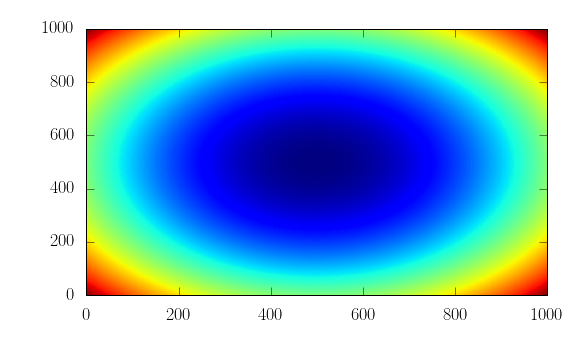

In [57]:
import matplotlib.pyplot as plt
%matplotlib notebook
X,Y = np.meshgrid(np.linspace(-1,1,1000),np.linspace(-1,1,1000))
plt.pcolor(X**2+Y**2)